In [0]:
import pandas as pd
from pathlib import Path
import os
from fastai import *
from fastai.tabular import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = Path(r'/content/drive/My Drive/Colab Notebooks/Youth_Unemployment/data')

In [0]:
os.listdir(data_path)

['Unemployment_2004-2019_tassi_provinciale_plus.csv',
 'survey_1TRIM_2019',
 'Demographic_2004-2019_provinciale.csv',
 'Unemployment_with_ra.csv',
 'Ita_spatialdata',
 'Unemployment_2017_merged.csv',
 'Demographic_2001-2017_composition_provinciale.csv',
 'Unemployment_with_ra_demcomp.csv',
 'Demographic_2016-2017_education_regionale.csv',
 'Unemployment_with_ra_demcomp_educat.csv',
 'Unemployment_with_ra_econ.csv']

In [0]:
#load train and test in this cell

In [0]:
unemp = os.path.join(data_path, 'Unemployment_with_ra_econ.csv')
unemp_df = pd.read_csv(unemp)

In [0]:
unemp_df.shape

(6562, 59)

In [0]:
unemp_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'TL',
       'Territory level and Typology', 'REG_ID', 'Region', 'VAR', 'Indicator',
       'SEX', 'Gender', 'POS', 'Position', 'TIME', 'Year', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'unemp_n', 'UNEM_RA_15_MAX',
       'UNEM_RA_15_MAX_SEXDIF', 'UNEM_RA_15_64', 'UNEM_RA_15_64_SEXDIF',
       'POP_65M_SH', 'YOU_DEP_RA', 'ELD_DEP_RA', 'DEM_DEP_RA', 'SR_TOT_RA',
       'SR_YOU_RA', 'SR_ELD_RA', 'KID_WOM_RA', 'POP_80M_SH', 'POP_TOT_GI',
       'POP_65M_GI', 'ENRL_RATE_AGE_Y3T5', 'ENRL_RATE_AGE_Y6T14',
       'ENRL_RATE_AGE_Y15T19', 'ENRL_RATE_AGE_Y20T29', 'ENRL_RATE_AGE_Y30T39',
       'ENRL_RATE_AGE_Y40T64', 'ENRL_RATE_AGE_Y30T39_is_NA',
       'UNEM_RA_15_MAX_is_NA', 'UNEM_RA_15_MAX_SEXDIF_is_NA',
       'UNEM_RA_15_64_is_NA', 'UNEM_RA_15_64_SEXDIF_is_NA', 'POP_65M_SH_is_NA',
       'YOU_DEP_RA_is_NA', 'ELD_DEP_RA_is_NA', 'DEM_DEP_RA_is_NA',
       'SR_TOT_RA_is_NA', 'SR_YOU_RA_is_NA', 'SR_ELD_RA_is_NA',
       'KI

In [0]:
unemp_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [0]:
unemp_df.head()

,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,SEX,Gender,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,unemp_n,UNEM_RA_15_MAX,UNEM_RA_15_MAX_SEXDIF,UNEM_RA_15_64,UNEM_RA_15_64_SEXDIF,POP_65M_SH,YOU_DEP_RA,ELD_DEP_RA,DEM_DEP_RA,SR_TOT_RA,SR_YOU_RA,SR_ELD_RA,KID_WOM_RA,POP_80M_SH,POP_TOT_GI,POP_65M_GI,ENRL_RATE_AGE_Y3T5,ENRL_RATE_AGE_Y6T14,ENRL_RATE_AGE_Y15T19,ENRL_RATE_AGE_Y20T29,ENRL_RATE_AGE_Y30T39,ENRL_RATE_AGE_Y40T64,ENRL_RATE_AGE_Y30T39_is_NA,UNEM_RA_15_MAX_is_NA,UNEM_RA_15_MAX_SEXDIF_is_NA,UNEM_RA_15_64_is_NA,UNEM_RA_15_64_SEXDIF_is_NA,POP_65M_SH_is_NA,YOU_DEP_RA_is_NA,ELD_DEP_RA_is_NA,DEM_DEP_RA_is_NA,SR_TOT_RA_is_NA,SR_YOU_RA_is_NA,SR_ELD_RA_is_NA,KID_WOM_RA_is_NA,POP_80M_SH_is_NA,POP_TOT_GI_is_NA,POP_65M_GI_is_NA,ENRL_RATE_AGE_Y3T5_is_NA,ENRL_RATE_AGE_Y6T14_is_NA,ENRL_RATE_AGE_Y15T19_is_NA,ENRL_RATE_AGE_Y20T29_is_NA,ENRL_RATE_AGE_Y40T64_is_NA
0,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2001,2001,PER,Persons,0,Units,116058.0,5.2,2.5,6.3,2.5,20.92,17.91,31.19,49.10,93.37,105.74,68.60,17.62,4.82,100.0,100.0,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
1,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2002,2002,PER,Persons,0,Units,120745.0,5.5,2.4,6.5,2.4,21.26,18.11,31.89,50.00,93.30,105.59,68.90,17.85,5.04,99.8,101.5,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2003,2003,PER,Persons,0,Units,100956.0,4.8,1.8,5.3,1.7,21.60,18.44,32.63,51.07,93.38,105.54,69.57,18.29,5.25,100.0,103.3,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
3,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2004,2004,PER,Persons,0,Units,101800.0,5.4,1.7,5.4,1.6,21.83,18.54,33.10,51.64,93.54,105.56,70.26,18.46,5.36,100.8,105.2,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2005,2005,PER,Persons,0,Units,89581.0,4.7,1.6,4.8,1.5,22.25,18.84,34.00,52.84,93.59,105.63,70.76,18.82,5.57,101.2,107.7,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [0]:
unemp_df.columns

Index(['TL', 'Territory level and Typology', 'REG_ID', 'Region', 'VAR',
       'Indicator', 'SEX', 'Gender', 'POS', 'Position', 'TIME', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'unemp_n',
       'UNEM_RA_15_MAX', 'UNEM_RA_15_MAX_SEXDIF', 'UNEM_RA_15_64',
       'UNEM_RA_15_64_SEXDIF', 'POP_65M_SH', 'YOU_DEP_RA', 'ELD_DEP_RA',
       'DEM_DEP_RA', 'SR_TOT_RA', 'SR_YOU_RA', 'SR_ELD_RA', 'KID_WOM_RA',
       'POP_80M_SH', 'POP_TOT_GI', 'POP_65M_GI', 'ENRL_RATE_AGE_Y3T5',
       'ENRL_RATE_AGE_Y6T14', 'ENRL_RATE_AGE_Y15T19', 'ENRL_RATE_AGE_Y20T29',
       'ENRL_RATE_AGE_Y30T39', 'ENRL_RATE_AGE_Y40T64',
       'ENRL_RATE_AGE_Y30T39_is_NA', 'UNEM_RA_15_MAX_is_NA',
       'UNEM_RA_15_MAX_SEXDIF_is_NA', 'UNEM_RA_15_64_is_NA',
       'UNEM_RA_15_64_SEXDIF_is_NA', 'POP_65M_SH_is_NA', 'YOU_DEP_RA_is_NA',
       'ELD_DEP_RA_is_NA', 'DEM_DEP_RA_is_NA', 'SR_TOT_RA_is_NA',
       'SR_YOU_RA_is_NA', 'SR_ELD_RA_is_NA', 'KID_WOM_RA_is_NA',
       'POP_80M_SH_is_NA', 'POP_TOT_GI

In [0]:
#create test df
msk = np.random.rand(len(unemp_df)) < 0.8
train_df = unemp_df[msk]
test_df = unemp_df[~msk]

In [0]:
len(train_df), len(test_df)

(5300, 1262)

In [0]:
#save both dataframes so tehy can be used next time
train_df.to_csv((os.path.join(data_path, 'train')))
test_df.to_csv((os.path.join(data_path, 'test')))

##Fastai Modelling

In [0]:
cat_vars = ['TL', 'Territory level and Typology', 'REG_ID', 'Region', 'VAR',
       'Indicator', 'SEX', 'Gender', 'POS', 'Position', 'TIME', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode','ENRL_RATE_AGE_Y30T39_is_NA', 'UNEM_RA_15_MAX_is_NA',
       'UNEM_RA_15_MAX_SEXDIF_is_NA', 'UNEM_RA_15_64_is_NA',
       'UNEM_RA_15_64_SEXDIF_is_NA', 'POP_65M_SH_is_NA', 'YOU_DEP_RA_is_NA',
       'ELD_DEP_RA_is_NA', 'DEM_DEP_RA_is_NA', 'SR_TOT_RA_is_NA',
       'SR_YOU_RA_is_NA', 'SR_ELD_RA_is_NA', 'KID_WOM_RA_is_NA',
       'POP_80M_SH_is_NA', 'POP_TOT_GI_is_NA', 'POP_65M_GI_is_NA',
       'ENRL_RATE_AGE_Y3T5_is_NA', 'ENRL_RATE_AGE_Y6T14_is_NA',
       'ENRL_RATE_AGE_Y15T19_is_NA', 'ENRL_RATE_AGE_Y20T29_is_NA',
       'ENRL_RATE_AGE_Y40T64_is_NA']

cont_vars = ['unemp_n', 'UNEM_RA_15_MAX_SEXDIF', 'UNEM_RA_15_64',
       'UNEM_RA_15_64_SEXDIF', 'POP_65M_SH', 'YOU_DEP_RA', 'ELD_DEP_RA',
       'DEM_DEP_RA', 'SR_TOT_RA', 'SR_YOU_RA', 'SR_ELD_RA', 'KID_WOM_RA',
       'POP_80M_SH', 'POP_TOT_GI', 'POP_65M_GI', 'ENRL_RATE_AGE_Y3T5',
       'ENRL_RATE_AGE_Y6T14', 'ENRL_RATE_AGE_Y15T19', 'ENRL_RATE_AGE_Y20T29',
       'ENRL_RATE_AGE_Y30T39', 'ENRL_RATE_AGE_Y40T64']

dep_var = 'UNEM_RA_15_MAX'

In [0]:
df = unemp_df[cat_vars + cont_vars + [dep_var]].copy()

In [0]:
df.shape

(6562, 59)

In [0]:
df.head()

,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,SEX,Gender,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,ENRL_RATE_AGE_Y30T39_is_NA,UNEM_RA_15_MAX_is_NA,UNEM_RA_15_MAX_SEXDIF_is_NA,UNEM_RA_15_64_is_NA,UNEM_RA_15_64_SEXDIF_is_NA,POP_65M_SH_is_NA,YOU_DEP_RA_is_NA,ELD_DEP_RA_is_NA,DEM_DEP_RA_is_NA,SR_TOT_RA_is_NA,SR_YOU_RA_is_NA,SR_ELD_RA_is_NA,KID_WOM_RA_is_NA,POP_80M_SH_is_NA,POP_TOT_GI_is_NA,POP_65M_GI_is_NA,ENRL_RATE_AGE_Y3T5_is_NA,ENRL_RATE_AGE_Y6T14_is_NA,ENRL_RATE_AGE_Y15T19_is_NA,ENRL_RATE_AGE_Y20T29_is_NA,ENRL_RATE_AGE_Y40T64_is_NA,unemp_n,UNEM_RA_15_MAX_SEXDIF,UNEM_RA_15_64,UNEM_RA_15_64_SEXDIF,POP_65M_SH,YOU_DEP_RA,ELD_DEP_RA,DEM_DEP_RA,SR_TOT_RA,SR_YOU_RA,SR_ELD_RA,KID_WOM_RA,POP_80M_SH,POP_TOT_GI,POP_65M_GI,ENRL_RATE_AGE_Y3T5,ENRL_RATE_AGE_Y6T14,ENRL_RATE_AGE_Y15T19,ENRL_RATE_AGE_Y20T29,ENRL_RATE_AGE_Y30T39,ENRL_RATE_AGE_Y40T64,UNEM_RA_15_MAX
0,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2001,2001,PER,Persons,0,Units,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,116058.0,2.5,6.3,2.5,20.92,17.91,31.19,49.10,93.37,105.74,68.60,17.62,4.82,100.0,100.0,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,5.2
1,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2002,2002,PER,Persons,0,Units,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,120745.0,2.4,6.5,2.4,21.26,18.11,31.89,50.00,93.30,105.59,68.90,17.85,5.04,99.8,101.5,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,5.5
2,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2003,2003,PER,Persons,0,Units,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,100956.0,1.8,5.3,1.7,21.60,18.44,32.63,51.07,93.38,105.54,69.57,18.29,5.25,100.0,103.3,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,4.8
3,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2004,2004,PER,Persons,0,Units,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,101800.0,1.7,5.4,1.6,21.83,18.54,33.10,51.64,93.54,105.56,70.26,18.46,5.36,100.8,105.2,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,5.4
4,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2005,2005,PER,Persons,0,Units,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,89581.0,1.6,4.8,1.5,22.25,18.84,34.00,52.84,93.59,105.63,70.76,18.82,5.57,101.2,107.7,95.332576,97.856061,84.415152,21.308333,2.35303,0.456818,4.7


In [0]:
train_idx = train_df.index
valid_idx = test_df.index

In [0]:
len(train_idx)+len(valid_idx)

6562

In [0]:
procs=[Categorify, Normalize]
data = (TabularList.from_df(df, path=data_path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idxs(train_idx, valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                   .databunch())

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=mean_squared_error)

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(6, 4)
    (1): Embedding(6, 4)
    (2): Embedding(133, 25)
    (3): Embedding(132, 25)
    (4): Embedding(2, 2)
    (5): Embedding(2, 2)
    (6): Embedding(4, 3)
    (7): Embedding(4, 3)
    (8): Embedding(2, 2)
    (9): Embedding(2, 2)
    (10): Embedding(18, 8)
    (11): Embedding(18, 8)
    (12): Embedding(2, 2)
    (13): Embedding(2, 2)
    (14): Embedding(2, 2)
    (15): Embedding(2, 2)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(3, 3)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(3, 3)
    (36): Embedding(3, 3)
  

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


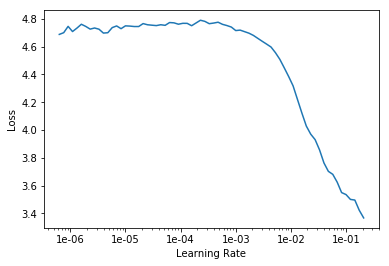

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,mean_squared_error,time
0,1.405269,0.140595,0.140595,00:02
1,0.278618,0.047225,0.047225,00:02
2,0.079489,0.022381,0.022381,00:02
3,0.032006,0.008479,0.008479,00:02
4,0.018905,0.009483,0.009483,00:02


In [0]:
learn.save('3')

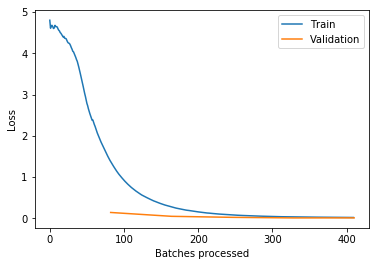

In [0]:
learn.recorder.plot_losses()

##Mean Absolute Error

In [0]:
procs=[Categorify, Normalize]
data = (TabularList.from_df(df, path=data_path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idxs(train_idx, valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList)
                   .databunch())

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=mean_absolute_error)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


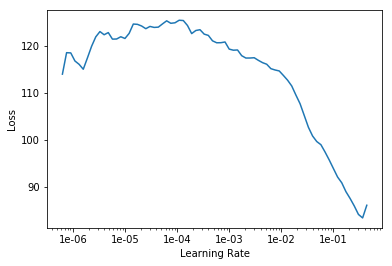

In [0]:
learn.recorder.plot()

In [0]:
learn.loss_func

FlattenedLoss of MSELoss()

In [0]:
  # start with a mega rate
  learn.fit_one_cycle(3, 3e-2)
  # 10x higher learn-rate with higher steps
  learn.fit_one_cycle(5, 1e-6, wd=0.3)
  # smaller rate with smaller steps
  learn.fit_one_cycle(5, 1e-07, wd=0.1)
  # plot losses

epoch,train_loss,valid_loss,mean_absolute_error,time
0,24.073822,4.024210,1.429913,00:02
1,7.170902,3.302963,1.199830,00:02
2,2.954985,1.606673,0.709498,00:02


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1.882171,2.239001,0.635029,00:02
1,1.814949,2.777106,0.485294,00:02
2,1.734639,0.803710,0.411577,00:02
3,1.594774,1.256801,0.479393,00:02
4,1.583491,0.969626,0.494769,00:02


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1.567605,1.668339,0.478029,00:02
1,1.621485,10.383844,0.730027,00:02
2,1.811287,1.901122,0.668210,00:02
3,1.781556,1.718232,0.536999,00:02
4,1.790659,1.153750,0.473317,00:02


In [0]:
learn.save('MAE_0.47')

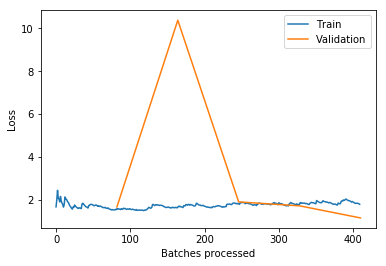

In [0]:
learn.recorder.plot_losses()

In [0]:
df.loc[2560]

TL                                                              3_IN
Territory level and Typology      Small regions (TL3) - intermediate
REG_ID                                                         ITG16
Region                                                          Enna
VAR                                                             UNEM
Indicator                                                 Unemployed
SEX                                                                T
Gender                                                         Total
POS                                                              ALL
Position                                                 All regions
TIME                                                            2007
Year                                                            2007
Unit Code                                                        PER
Unit                                                         Persons
PowerCode Code                    

In [0]:
prediction = learn.predict(df.loc[2560])
prediction[1][0]

tensor(2.7485)

In [0]:
math.exp(int(prediction[1][0]))

7.38905609893065

##Log model

In [0]:
max_log_y = np.log(np.max(df['UNEM_RA_15_MAX'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


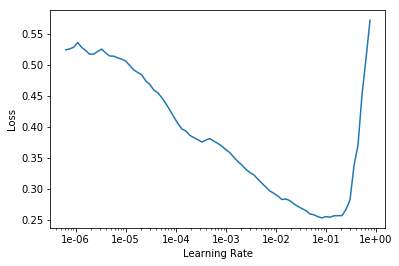

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.083691,0.059473,0.292867,00:02
1,0.043360,0.018159,0.130887,00:02
2,0.029145,0.015498,0.128603,00:02
3,0.020449,0.008917,0.090437,00:02
4,0.015532,0.009615,0.100261,00:02


In [0]:
learn.save('5')

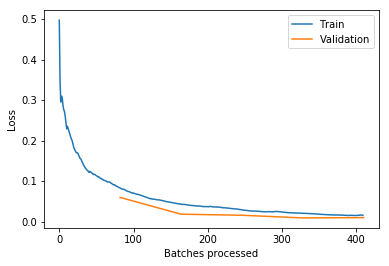

In [0]:
learn.recorder.plot_losses()

In [0]:
df.loc[2560]

TL                                                              3_IN
Territory level and Typology      Small regions (TL3) - intermediate
REG_ID                                                         ITG16
Region                                                          Enna
VAR                                                             UNEM
Indicator                                                 Unemployed
SEX                                                                T
Gender                                                         Total
POS                                                              ALL
Position                                                 All regions
TIME                                                            2007
Year                                                            2007
Unit Code                                                        PER
Unit                                                         Persons
PowerCode Code                    

In [0]:
prediction = learn.predict(df.loc[2560])
prediction[1][0]

tensor(2.6823)

In [0]:
math.exp(int(prediction[1][0]))

7.38905609893065

##exp_rmspe

In [1]:
procs=[Categorify, Normalize]
data = (TabularList.from_df(df, path=data_path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idxs(train_idx, valid_idx)
                   .databunch())


NameError: ignored

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=mean_squared_error)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


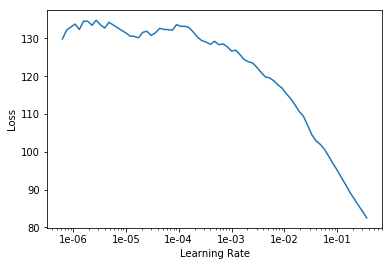

In [0]:
learn.recorder.plot()

In [0]:
learn.loss_func

FlattenedLoss of MSELoss()

In [0]:
  # start with a mega rate
  learn.fit_one_cycle(5, 5e-3, wd=0.2)
  # 10x higher learn-rate with higher steps
  #learn.fit_one_cycle(5, 1e-6, wd=0.3)
  # smaller rate with smaller steps
  #learn.fit_one_cycle(5, 1e-07, wd=0.1)
  # plot losses

epoch,train_loss,valid_loss,mean_squared_error,time
0,70.217438,12.771888,12.771888,00:02
1,15.007418,2.682809,2.682809,00:02
2,4.936796,1.798971,1.798971,00:02
3,2.523852,0.978474,0.978474,00:02
4,1.715888,0.907528,0.907528,00:02


In [0]:
learn.save('rmse_0.9')

In [0]:
learn.fit_one_cycle(5, 5e-4, wd=0.1)

epoch,train_loss,valid_loss,mean_squared_error,time
0,1.542765,0.991737,0.991737,00:02
1,1.670282,0.918391,0.918391,00:02
2,1.463766,0.892017,0.892017,00:02
3,1.338540,0.667478,0.667478,00:02
4,1.297957,0.727038,0.727038,00:02


In [0]:
learn.save('rmse_0.72')

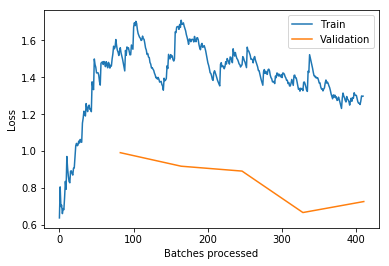

In [0]:
learn.recorder.plot_losses()

In [0]:
len(learn.data.valid_ds)

1262

In [0]:
#The first element of the tuple is a tensor that contains all the predictions. 
#While the second element of the tuple is a tensor that contains all the target labels.

preds = learn.get_preds()
print(len(preds[0]), len(preds[1]))

1262 1262


##Explain the model

In [0]:
pip install shap

     |████████████████████████████████| 245kB 3.5MB/s 
  Created wheel for shap: filename=shap-0.30.1-cp36-cp36m-linux_x86_64.whl size=360448 sha256=3b65131c3c805a65c6ca7fd3f3ee07455ca416679222dc31f0ea199ae9b1d43d
  Stored in directory: /root/.cache/pip/wheels/62/94/5e/feb9af12d63a719a32266a29ca564b4dc37b4755052aca6859
Successfully built shap


In [0]:
import copy

def feature_importance(learn:Learner, cats:list, conts:list, dep_var:str, test:DataFrame):
  data = learn.data.train_ds.x
  procs = data.procs
  cat, cont = copy.deepcopy(cats), copy.deepcopy(conts)
  if 'CrossEntropyLoss' in str(learn.loss_func):
    dt = (TabularList.from_df(test, path='', cat_names=cat, cont_names=cont, 
                              procs=procs)
                             .split_none()
                             .label_from_df(cols=dep_var)
                             .databunch(bs=learn.data.batch_size))
  else:
    dt = (TabularList.from_df(test, path='', cat_names=cat, cont_names=cont, 
                              procs=procs)
                             .split_none()
                             .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                             .databunch(bs=learn.data.batch_size))
    
  learn.data.valid_dl = dt.train_dl
  loss0 = float(learn.validate()[1])
  
  fi=dict()
  cat, cont = copy.deepcopy(cats), copy.deepcopy(conts)
  types = [cat, cont]
  for j, t in enumerate(types):
    for i, c in enumerate(t):
      print(c)
      base = test.copy()
      base[c] = base[c].sample(n=len(base), replace=True).reset_index(drop=True)
      cat, cont = copy.deepcopy(cats), copy.deepcopy(conts)
      if 'CrossEntropyLoss' in str(learn.loss_func):
        dt = (TabularList.from_df(base, path='', cat_names=cat, cont_names=cont, 
                              procs=procs)
                             .split_none()
                             .label_from_df(cols=dep_var)
                             .databunch(bs=learn.data.batch_size))
      else:
        dt = (TabularList.from_df(test, path='', cat_names=cat, cont_names=cont, 
                              procs=procs)
                             .split_none()
                             .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                             .databunch(bs=learn.data.batch_size))
      learn.data.valid_dl = dt.train_dl
      fi[c] = float(learn.validate()[1]) - loss0
      
  d = sorted(fi.items(), key =lambda kv: kv[1], reverse=True)
  df = pd.DataFrame({'Variable': [l for l, v in d], 'Accuracy': [v for l, v in d]})
  df['Type'] = ''
  for x in range(len(df)):
    if df['Variable'].iloc[x] in cats:
      df['Type'].iloc[x] = 'categorical'
    if df['Variable'].iloc[x] in conts:
      df['Type'].iloc[x] = 'continuous'
  return df      

In [0]:
feature_importance(learn, cat_vars, cont_vars, dep_var, test_df)

,Variable,Accuracy,Type
0,UNEM_RA_15_64_SEXDIF,0.371437,continuous
1,unemp_n,-0.083961,continuous
2,KID_WOM_RA_is_NA,-0.162323,categorical
3,POS,-0.250160,categorical
4,ENRL_RATE_AGE_Y30T39_is_NA,-0.318932,categorical
5,POP_TOT_GI,-0.345467,continuous
6,POP_80M_SH_is_NA,-0.490807,categorical
7,YOU_DEP_RA,-0.510376,continuous
8,UNEM_RA_15_64_is_NA,-0.517838,categorical
9,TL,-0.536079,categorical
